In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data/')

Found 2041 files belonging to 2 classes.


In [3]:
class_names = data.class_names
class_names

['fake', 'real']

In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

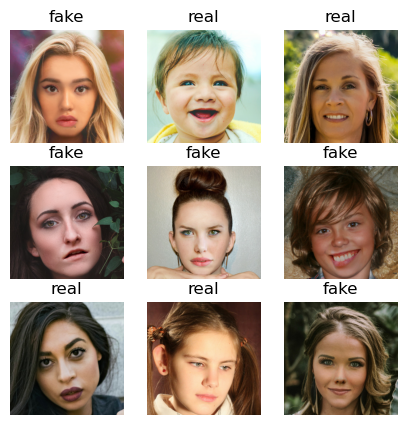

In [5]:
plt.figure(figsize=(5, 5))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
data = data.map(lambda x,y: (x/255, y)) # x/255
data.as_numpy_iterator().next()

(array([[[[0.8696624 , 0.6134737 , 0.46831438],
          [0.87322307, 0.61041665, 0.46403188],
          [0.87175244, 0.6050858 , 0.45471814],
          ...,
          [0.8810049 , 0.644424  , 0.514951  ],
          [0.88756126, 0.64050245, 0.5136642 ],
          [0.88406193, 0.6370031 , 0.51016486]],
 
         [[0.8612946 , 0.5788804 , 0.42183384],
          [0.8625    , 0.5838235 , 0.41911766],
          [0.8586397 , 0.57230395, 0.41127452],
          ...,
          [0.86789215, 0.6168505 , 0.47555146],
          [0.8666035 , 0.6153809 , 0.47414216],
          [0.86917895, 0.61023283, 0.4728554 ]],
 
         [[0.8428309 , 0.5394608 , 0.36409312],
          [0.8403186 , 0.5369485 , 0.35373774],
          [0.8417279 , 0.5359356 , 0.35323128],
          ...,
          [0.84957105, 0.5733456 , 0.41256127],
          [0.85310775, 0.56946325, 0.41115198],
          [0.8520833 , 0.56550246, 0.4086397 ]],
 
         ...,
 
         [[0.76396483, 0.41494524, 0.18749425],
          [0.76611

In [7]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Reshape
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet_model.layers:
    layer.trainable = False

model = Sequential()
model.add(resnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(Reshape((1, -1))) 
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
loss = 'binary_crossentropy'
model.compile(loss=loss, optimizer='adam', metrics=["accuracy"])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 reshape (Reshape)           (None, 1, 2048)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               1114624   
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 24702465 (94.23 MB)
Trainable params: 1114753 (4.25 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [11]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5


44/44 [==============================] - 119s 2s/step - loss: 0.7064 - accuracy: 0.4979 - val_loss: 0.6916 - val_accuracy: 0.5260
Epoch 2/5
44/44 [==============================] - 105s 2s/step - loss: 0.6946 - accuracy: 0.5050 - val_loss: 0.6883 - val_accuracy: 0.5703
Epoch 3/5
44/44 [==============================] - 103s 2s/step - loss: 0.6920 - accuracy: 0.5249 - val_loss: 0.6902 - val_accuracy: 0.5339
Epoch 4/5
44/44 [==============================] - 106s 2s/step - loss: 0.6940 - accuracy: 0.4957 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 5/5
 8/44 [====>.........................] - ETA: 1:04 - loss: 0.6924 - accuracy: 0.5117

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit
history = hist.history

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test)

In [ ]:
print("Loss: ", loss)
print("Accuracy: ", accuracy)